In [1]:
import os
import sys
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (22, 10)

In [3]:
try:
    from plot_lib import get_cartographic_boundary as gcb
except ModuleNotFoundError:
    sys.path.append('..')
    from plot_lib import get_cartographic_boundary as gcb

from plot_lib import get_ref

In [4]:
gcb.download(gcb.get_url(type='shp', entity='county', resolution='500k'))
get_ref.download(get_ref.get_url(year=2018, name='state-geocodes'))

cb_2018_us_county_500k.zip already exists. Skipping download.
state-geocodes-v2018.xlsx already exists. Skipping download.


In [5]:
geocodes = pd.read_excel('../data/state-geocodes-v2018.xlsx', skiprows=5, dtype='str')

In [6]:
geocodes = geocodes.loc[geocodes['State (FIPS)']!='00']

In [7]:
rename_cols = {
    'State (FIPS)': 'state_fp', 
    'Name': 'state_name', 
    'Region': 'region', 
    'Division': 'division',
}
geocodes = geocodes.rename(columns=rename_cols)

In [8]:
geocodes.head()

,region,division,state_fp,state_name
2,1,1,09,Connecticut
3,1,1,23,Maine
4,1,1,25,Massachusetts
5,1,1,33,New Hampshire
6,1,1,44,Rhode Island


In [9]:
file_path = os.path.abspath('../data/cb_2018_us_county_500k.zip')
geo_df = gpd.read_file('zip://' + file_path)
geo_df.columns = [c.lower() for c in geo_df.columns]
geo_df = geo_df.rename(columns={
    'statefp': 'state_fp',
    'countyfp': 'county_fp',
    'countyns': 'county_ns',
})
geo_df = pd.merge(geo_df, 
                  geocodes[['state_fp', 'state_name']], 
                  on=['state_fp'], how='left')

In [10]:
geo_df.head()

,state_fp,county_fp,county_ns,affgeoid,geoid,name,lsad,aland,awater,geometry,state_name
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18136899999999 37.046305, -89.17...",Kentucky
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.442661 38.283236, -84.441137 38....",Kentucky
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,"POLYGON ((-86.944858 37.073407, -86.9434589999...",Kentucky
3,21,065,00516879,0500000US21065,21065,Estill,06,655509930,6516335,"POLYGON ((-84.12661799999999 37.645404, -84.12...",Kentucky
4,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428199999999 38.445493, -83.98...",Kentucky


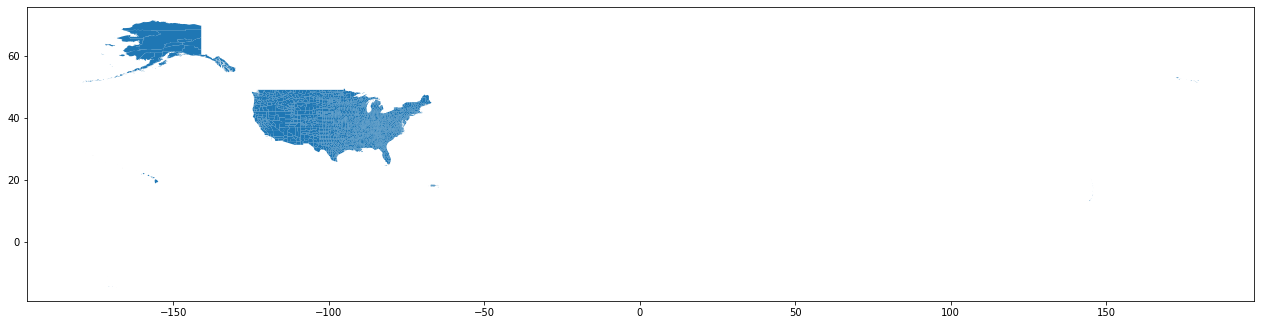

In [11]:
geo_df.plot()

In [12]:
geo_df[geo_df['state_fp']=='29'].head()

,state_fp,county_fp,county_ns,affgeoid,geoid,name,lsad,aland,awater,geometry,state_name
108,29,057,00758483,0500000US29057,29057,Dade,06,1269121009,42072595,"POLYGON ((-94.082083 37.349291, -94.0811729999...",Missouri
109,29,143,00758526,0500000US29143,29143,New Madrid,06,1747868662,56238249,"POLYGON ((-89.971289 36.393135, -89.970315 36....",Missouri
110,29,157,00758533,0500000US29157,29157,Perry,06,1228574133,25394865,"POLYGON ((-90.146807 37.638587, -90.146778 37....",Missouri
111,29,189,00758549,0500000US29189,29189,St. Louis,06,1314228662,40161918,"POLYGON ((-90.73643 38.469853, -90.73613999999...",Missouri
112,29,199,00758552,0500000US29199,29199,Scotland,06,1130548364,7217862,"POLYGON ((-92.351404 40.491573, -92.3512219999...",Missouri


In [13]:
geo_df[geo_df['state_name']=='Missouri'].head()

,state_fp,county_fp,county_ns,affgeoid,geoid,name,lsad,aland,awater,geometry,state_name
108,29,057,00758483,0500000US29057,29057,Dade,06,1269121009,42072595,"POLYGON ((-94.082083 37.349291, -94.0811729999...",Missouri
109,29,143,00758526,0500000US29143,29143,New Madrid,06,1747868662,56238249,"POLYGON ((-89.971289 36.393135, -89.970315 36....",Missouri
110,29,157,00758533,0500000US29157,29157,Perry,06,1228574133,25394865,"POLYGON ((-90.146807 37.638587, -90.146778 37....",Missouri
111,29,189,00758549,0500000US29189,29189,St. Louis,06,1314228662,40161918,"POLYGON ((-90.73643 38.469853, -90.73613999999...",Missouri
112,29,199,00758552,0500000US29199,29199,Scotland,06,1130548364,7217862,"POLYGON ((-92.351404 40.491573, -92.3512219999...",Missouri


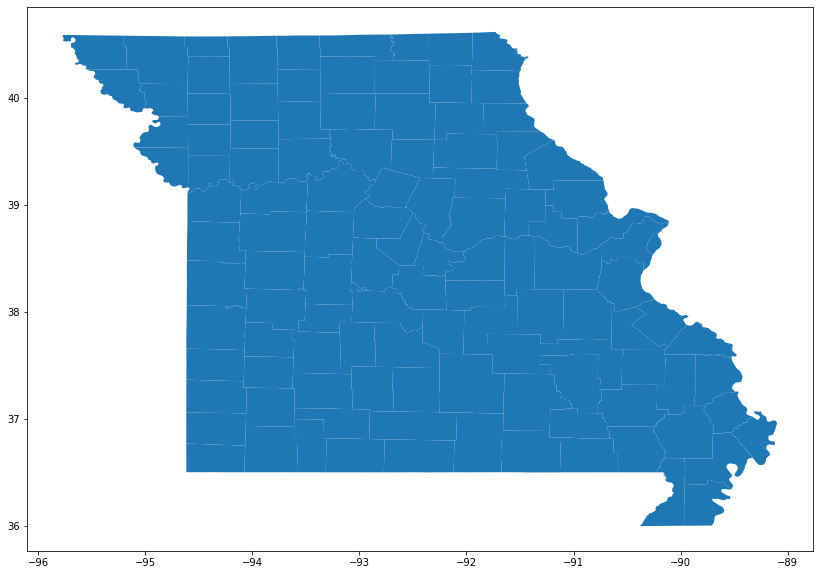

In [14]:
geo_df[geo_df['state_name']=='Missouri'].plot()

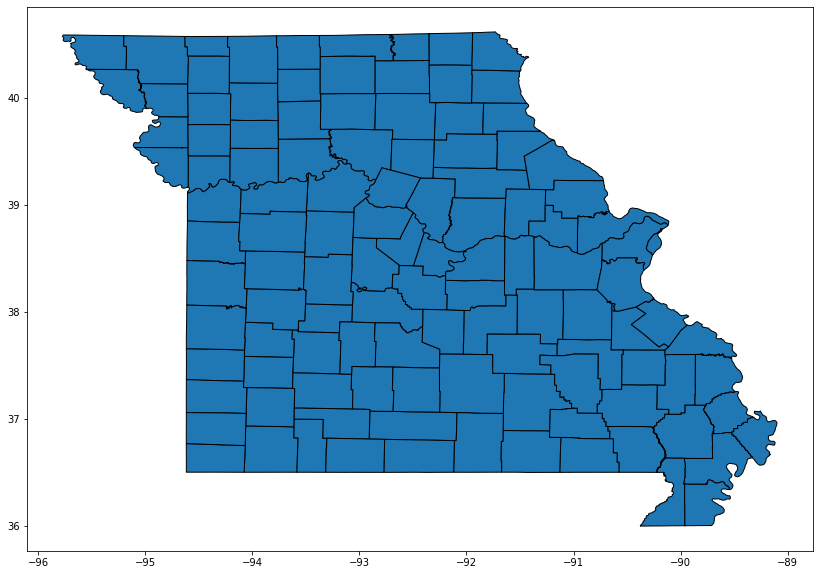

In [15]:
geo_df[geo_df['state_name']=='Missouri'].plot(edgecolor='black')

In [16]:
mo_census = pd.read_csv('../data/PEP_2018_PEPANNRES_with_ann.csv', skiprows=1, dtype={'Id': 'str', 'Id2': 'str'})
mo_census.columns = ['affgeoid', 'geoid', 'geography', 'census_2010', 'pop_est_base', 
                     'pop_est_2010', 'pop_est_2011', 'pop_est_2012', 'pop_est_2013', 'pop_est_2014', 
                     'pop_est_2015', 'pop_est_2016', 'pop_est_2017', 'pop_est_2018']

In [17]:
mo_df = pd.merge(
    geo_df[geo_df['state_name']=='Missouri'].copy(),
    mo_census,
    on=['geoid'],
    how='left')

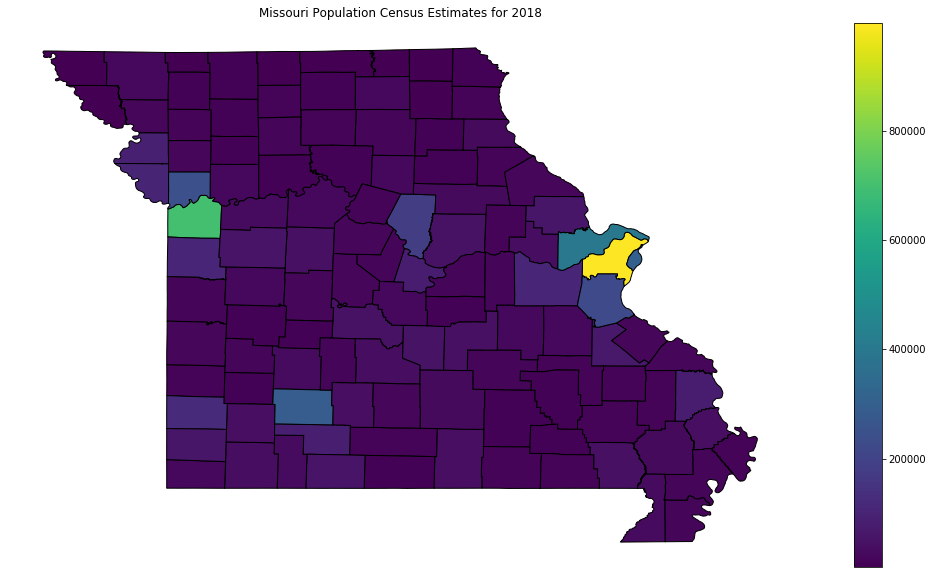

In [18]:
ax = mo_df.plot('pop_est_2018', legend=True, edgecolor='black')
ax.set_title('Missouri Population Census Estimates for 2018')
ax.set_axis_off() # lat long values aren't particularly useful here

In [19]:
mo_colleges = pd.read_csv('../data/mo_colleges.csv')
mo_colleges['Enrollment'] = mo_colleges['Enrollment'].apply(lambda x: int(x.replace(',', '')))
# normalize enrollment 20-50 for markersize values
mo_colleges['EnrollmentNormalized'] = (
    100 * (mo_colleges['Enrollment'] - mo_colleges['Enrollment'].min()) / 
         (mo_colleges['Enrollment'].max() - mo_colleges['Enrollment'].min())
    + 30
)
mo_colleges['point'] = mo_colleges.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)

In [20]:
mo_geo = gpd.GeoDataFrame(mo_colleges, geometry=mo_colleges['point'])

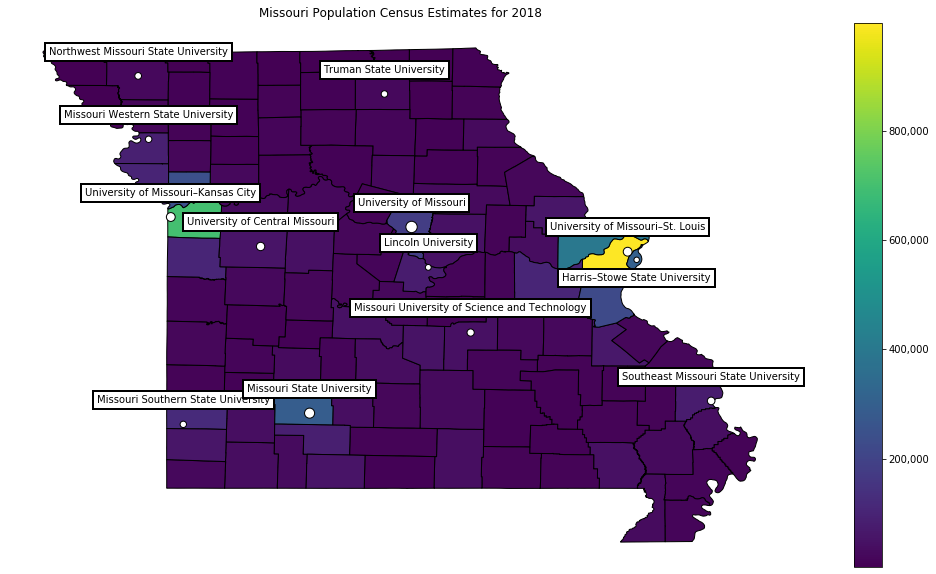

In [21]:
fig, ax = plt.subplots()
mo_df.plot('pop_est_2018', legend=True, edgecolor='black', ax=ax)
ax.set_title('Missouri Population Census Estimates for 2018')
ax.set_axis_off() # lat long values aren't particularly useful here
mo_geo.plot(markersize='EnrollmentNormalized', ax=ax, color='white', edgecolor='black')

def _annotate(x):
    y_offset = 0.2
    # we can shift the offset to be below instead of above for certain records
    if x['School']=='Harris–Stowe State University':
        y_offset = -y_offset

    coords = x.geometry.centroid.coords[0]
    
    ax.annotate(x['School'],
                xy=coords, 
                xytext=(coords[0], 
                        coords[1] + y_offset), 
                ha='center',
                bbox=dict(fc="white", ec="black", lw=2))

mo_geo.apply(_annotate, axis=1)
cax = fig.get_axes()[1] # colorbar is axis[1]
cax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: '{:,}'.format(int(x))))
plt.show()

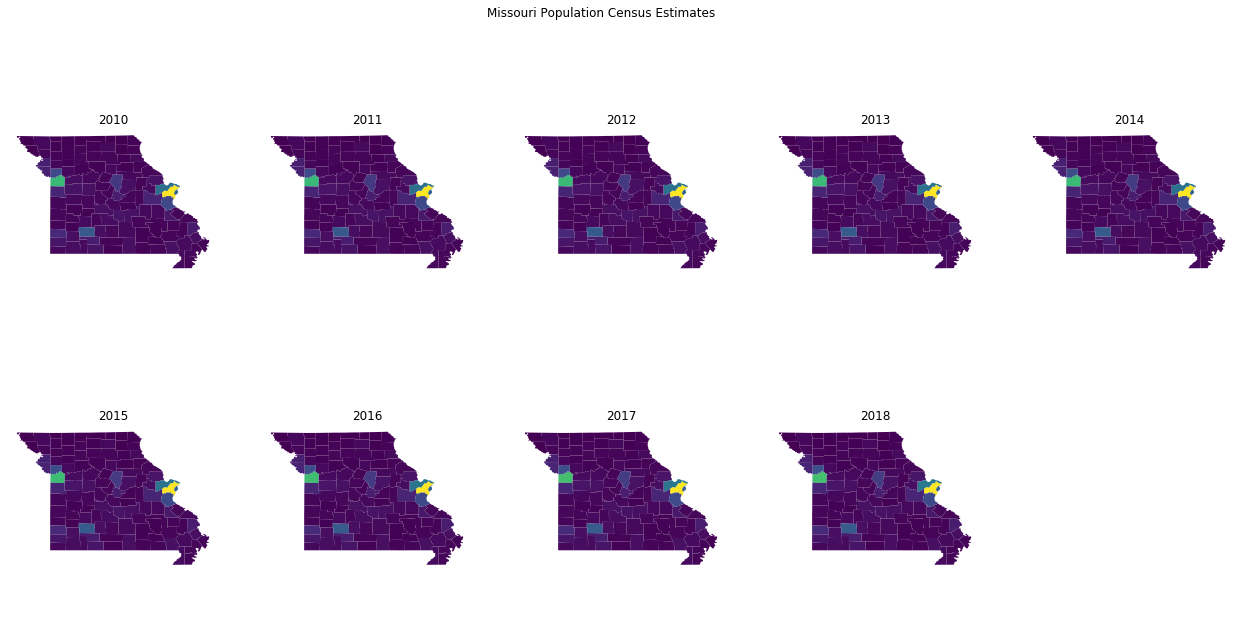

In [22]:
# an example of multi-year looping with axis sharing but not particularly interesting
years = [
    [2010, 2011, 2012, 2013, 2014],
    [2015, 2016, 2017, 2018, None]
]

fig, axes = plt.subplots(ncols=5, nrows=2, sharex=True, sharey=True, )
fig.suptitle('Missouri Population Census Estimates')
for i in range(2):
    for j in range(5):
        year = years[i][j]
        ax = axes[i, j]
        if year is not None:
            mo_df.plot(f'pop_est_{year}', ax=ax)
            ax.set_title(year)
        ax.set_axis_off() # lat long values aren't particularly useful here